## 1章 

### ２項分布

In [1]:
from scipy.special import comb
import matplotlib.pyplot as plt

In [2]:
def conbProb(p, n, k):
    return comb(n, k)*pow(p, k)*pow(1-p,n-k)

In [3]:
n = 10
p = 0.5
s = [conbProb(p, n, i) for i in range(0, n+1)]

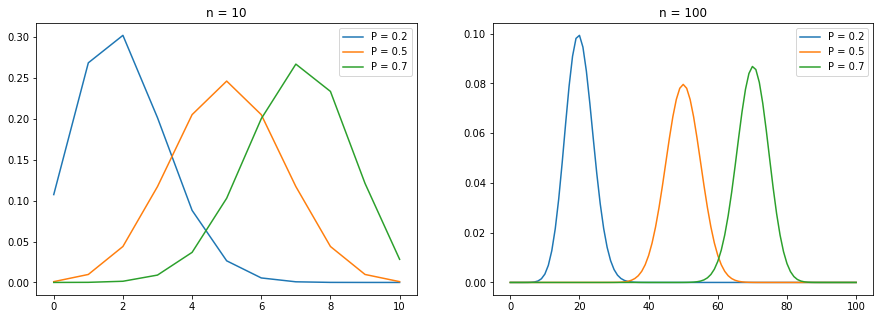

In [4]:
x =  list(range(0, n+1))
fig, axis = plt.subplots(nrows = 1, ncols=2, figsize = (15, 5));
for idx,n in enumerate([10, 100]):
    for p in [0.2, 0.5, 0.7]:
        x = list(range(0, n+1))
        y = [conbProb(p, n, i) for i in range(0, n+1)]
        axis[idx].plot(x,y, label= f"P = {p}")
        axis[idx].set_title(f"n = {n}")
    axis[idx].legend()


fig.show()

## 幾何分布

In [5]:
import numpy as np
from scipy.stats import geom

In [6]:
print(p,1/p)
geom.stats(p, moments='mvsk')

0.7 1.4285714285714286


(array(1.42857143), array(0.6122449), array(2.37346442), array(7.63333333))

In [7]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [8]:
def _GeometricDistribution(p, r):
    return np.where(r == 0, 0, p*pow(1-p,r-1))
    
def GeometricDistribution(p, r):
    return np.vectorize(_GeometricDistribution)(p, r)
    # return np.vectorize(_lambda x: GeometricDistribution, excluded=["p"])(p, r)

In [9]:
x = np.arange(0,n+1)
# GeometricDistribution(0.2, x)

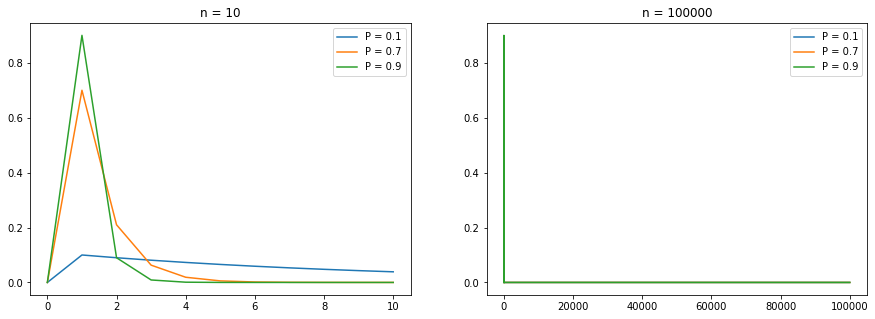

In [10]:
x =  list(range(0, n+1))
fig, axis = plt.subplots(nrows = 1, ncols=2, figsize = (15, 5));
for idx,n in enumerate([10, 100000]):
    for p in [0.1, 0.7, 0.9]:
        x = np.arange(n+1)
        y = GeometricDistribution(p, x)
        axis[idx].plot(x, y, label= f"P = {p}")
        axis[idx].set_title(f"n = {n}")
    axis[idx].legend()

fig.show()

## 負の２項分布

In [11]:
def N_BioDist(p, r, m):
    return np.where(r > m, 0, comb(r-1,m-1)*pow(p,m-1)*pow(1-p,n-m))

In [13]:
n = 10
x = np.arange(n+1)
r = 0.1
y = N_BioDist(p, r, x)

ValueError: x and y must have same first dimension, but have shapes (11,) and (1,)

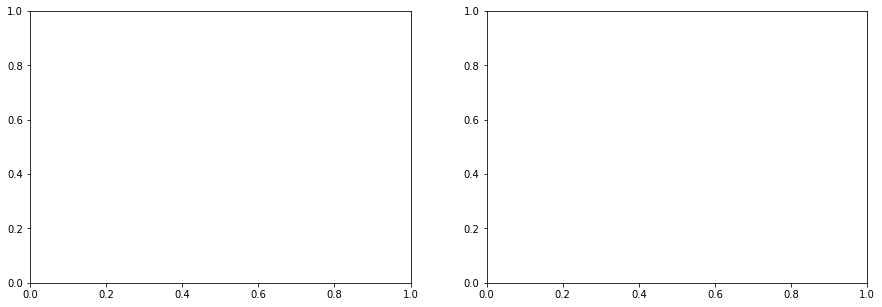

In [141]:
r = 3
fig, axis = plt.subplots(nrows = 1, ncols=2, figsize = (15, 5));
for idx,n in enumerate([10, 100000]):
    for p in [0.1, 0.7, 0.9]:
        x = np.arange(n+1)
        y = N_BioDist(p, r, n)
        axis[idx].plot(x, y, label= f"P = {p}")
        axis[idx].set_title(f"n = {n}")
    axis[idx].legend()

## 超幾何分布

In [46]:
import matplotlib.pyplot as plt

In [67]:
def hypergeometric_distribution(x, N_, n_, R_):
    return comb(R_, x)/comb(N_, n_)*comb(N_-R_, n_-x)

In [146]:
N = 1000
n = 100
R = 300

### 超幾何分布のグラフ

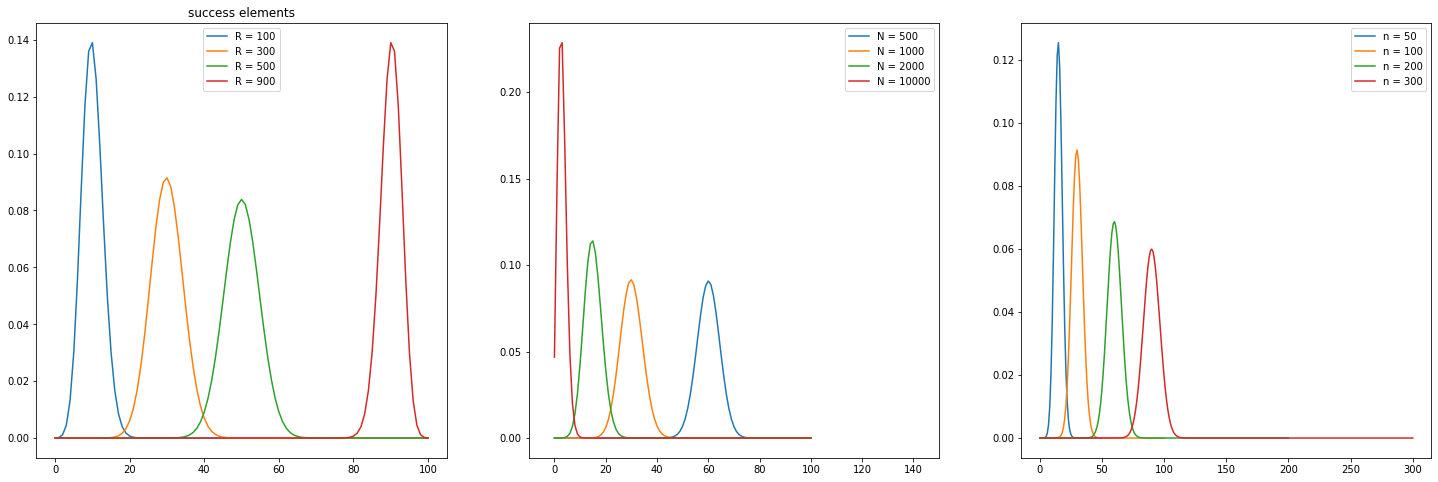

In [148]:
fig, axis = plt.subplots(1,3, figsize=(25,8))

# 成功状態数
for r in [100, 300, 500, 900]:
    X = np.arange(0,n+1,1)
    Y = np.vectorize(hypergeometric_distribution, excluded=["N", "n", 'R'])(X, N, n, r)    
    axis[0].plot(X,Y,label=f'R = {r}')
axis[0].legend()
axis[0].set_title("success elements")

# 抽出対象全体
for n_ in [500, 1000, 2000, 10000]:
    X = np.arange(0,n+1,1)
    Y = np.vectorize(hypergeometric_distribution, excluded=["N", "n", 'R'])(X, n_, n, R)    
    axis[1].plot(X,Y,label=f'N = {n_}')
    axis[1].set_xlim([-10, 150])
axis[1].legend()

# 抽出対象全体
for n_ in [50, 100, 200, 300]:
    X = np.arange(0,n_+1,1)
    Y = np.vectorize(hypergeometric_distribution, excluded=["N", "n", 'R'])(X, N, n_, R)    
    axis[2].plot(X,Y,label=f'n = {n_}')
    # axis[2].set_xlim([-10, 150])
axis[2].legend()

## ガンマ分布

In [152]:
alpha = 1
beta = 2

In [162]:
np.range()
stats.gamma.pdf(10,alpha,beta)

0.00033546262790251185